In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from datetime import datetime,timedelta
from collections import Counter
from tqdm import tqdm
import glob

from sklearn.model_selection import train_test_split
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

from data_augment import *

In [2]:
data=pd.read_csv("Generated Data/atp_data_augmented2.csv", encoding = "ISO-8859-1")
num_df = data.iloc[:,2:].copy()
Target = np.array(num_df.loc[:,"Winner"]).reshape((num_df.shape[0], 1))
Data = np.array(num_df.loc[:, [c != "Winner" for c in num_df.columns]])
print(Data.shape, Target.shape)
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.25, random_state=42)

(62026, 163) (62026, 1)


In [38]:
params = {"objective":"binary:logistic", "max_depth":8, "learning_rate":0.1, "colsample_bytree":0.6, 
          "subsample":0.6, "n_estimators":999 }
clf = xgb.XGBClassifier(**params)

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [39]:
clf.fit(X_train, y_train, early_stopping_rounds=5,
               eval_set=[(X_test, y_test)], eval_metric='logloss',
        verbose=True )


[0]	validation_0-logloss:0.650897
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.607292
[2]	validation_0-logloss:0.559797
[3]	validation_0-logloss:0.521997
[4]	validation_0-logloss:0.487023
[5]	validation_0-logloss:0.456839
[6]	validation_0-logloss:0.429534
[7]	validation_0-logloss:0.403723
[8]	validation_0-logloss:0.382176
[9]	validation_0-logloss:0.361456
[10]	validation_0-logloss:0.345179
[11]	validation_0-logloss:0.324494
[12]	validation_0-logloss:0.312561
[13]	validation_0-logloss:0.296721
[14]	validation_0-logloss:0.285818
[15]	validation_0-logloss:0.271069
[16]	validation_0-logloss:0.260068
[17]	validation_0-logloss:0.249757
[18]	validation_0-logloss:0.237204
[19]	validation_0-logloss:0.228832
[20]	validation_0-logloss:0.220963
[21]	validation_0-logloss:0.211822
[22]	validation_0-logloss:0.204394
[23]	validation_0-logloss:0.198061
[24]	validation_0-logloss:0.19182
[25]	validation_0-logloss:0.184798
[26]	validation_0-logloss:0.178057

[230]	validation_0-logloss:0.046408
[231]	validation_0-logloss:0.046359
[232]	validation_0-logloss:0.046356
[233]	validation_0-logloss:0.046306
[234]	validation_0-logloss:0.046219
[235]	validation_0-logloss:0.046232
[236]	validation_0-logloss:0.04619
[237]	validation_0-logloss:0.046177
[238]	validation_0-logloss:0.046154
[239]	validation_0-logloss:0.046143
[240]	validation_0-logloss:0.046104
[241]	validation_0-logloss:0.046128
[242]	validation_0-logloss:0.046112
[243]	validation_0-logloss:0.046123
[244]	validation_0-logloss:0.04599
[245]	validation_0-logloss:0.045932
[246]	validation_0-logloss:0.045893
[247]	validation_0-logloss:0.045895
[248]	validation_0-logloss:0.045831
[249]	validation_0-logloss:0.045846
[250]	validation_0-logloss:0.04585
[251]	validation_0-logloss:0.045771
[252]	validation_0-logloss:0.045668
[253]	validation_0-logloss:0.045621
[254]	validation_0-logloss:0.045532
[255]	validation_0-logloss:0.045544
[256]	validation_0-logloss:0.045452
[257]	validation_0-logloss:0.04

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=999,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [40]:
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)
preds = preds.reshape(*y_test.shape)
print("Accuracy {} %".format(round(np.sum(preds==y_test)/y_test.shape[0],2)*100))

Accuracy 98.0 %


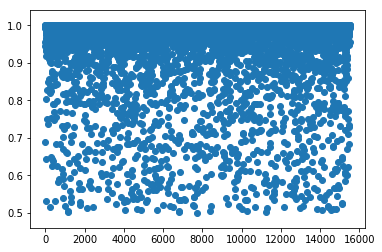

In [48]:
plt.scatter(np.arange(probs.shape[0]), probs.max(axis=1))